Calculating with numerical omega = -0.50000+0.86603j

--- Populating Operators from Explicit Definitions ---
Done populating A(p,q) (Verified Hermitian) and D(m,n) from explicit definitions.

--- Determining Path Order ---
Found Eulerian Circuit, 36 unique edges will be plotted in order.
Using path order (length 36): Eulerian

Plots will be saved in directory: 'plots_output/'

=== Generating Path Plots for Re(a_1) ===
Calculating and plotting paths for Lambda_1...
Saved: plots_output\path_evolution_Re_ak_1.png
Saved: plots_output\path_evolution_Re_ak_1.pdf


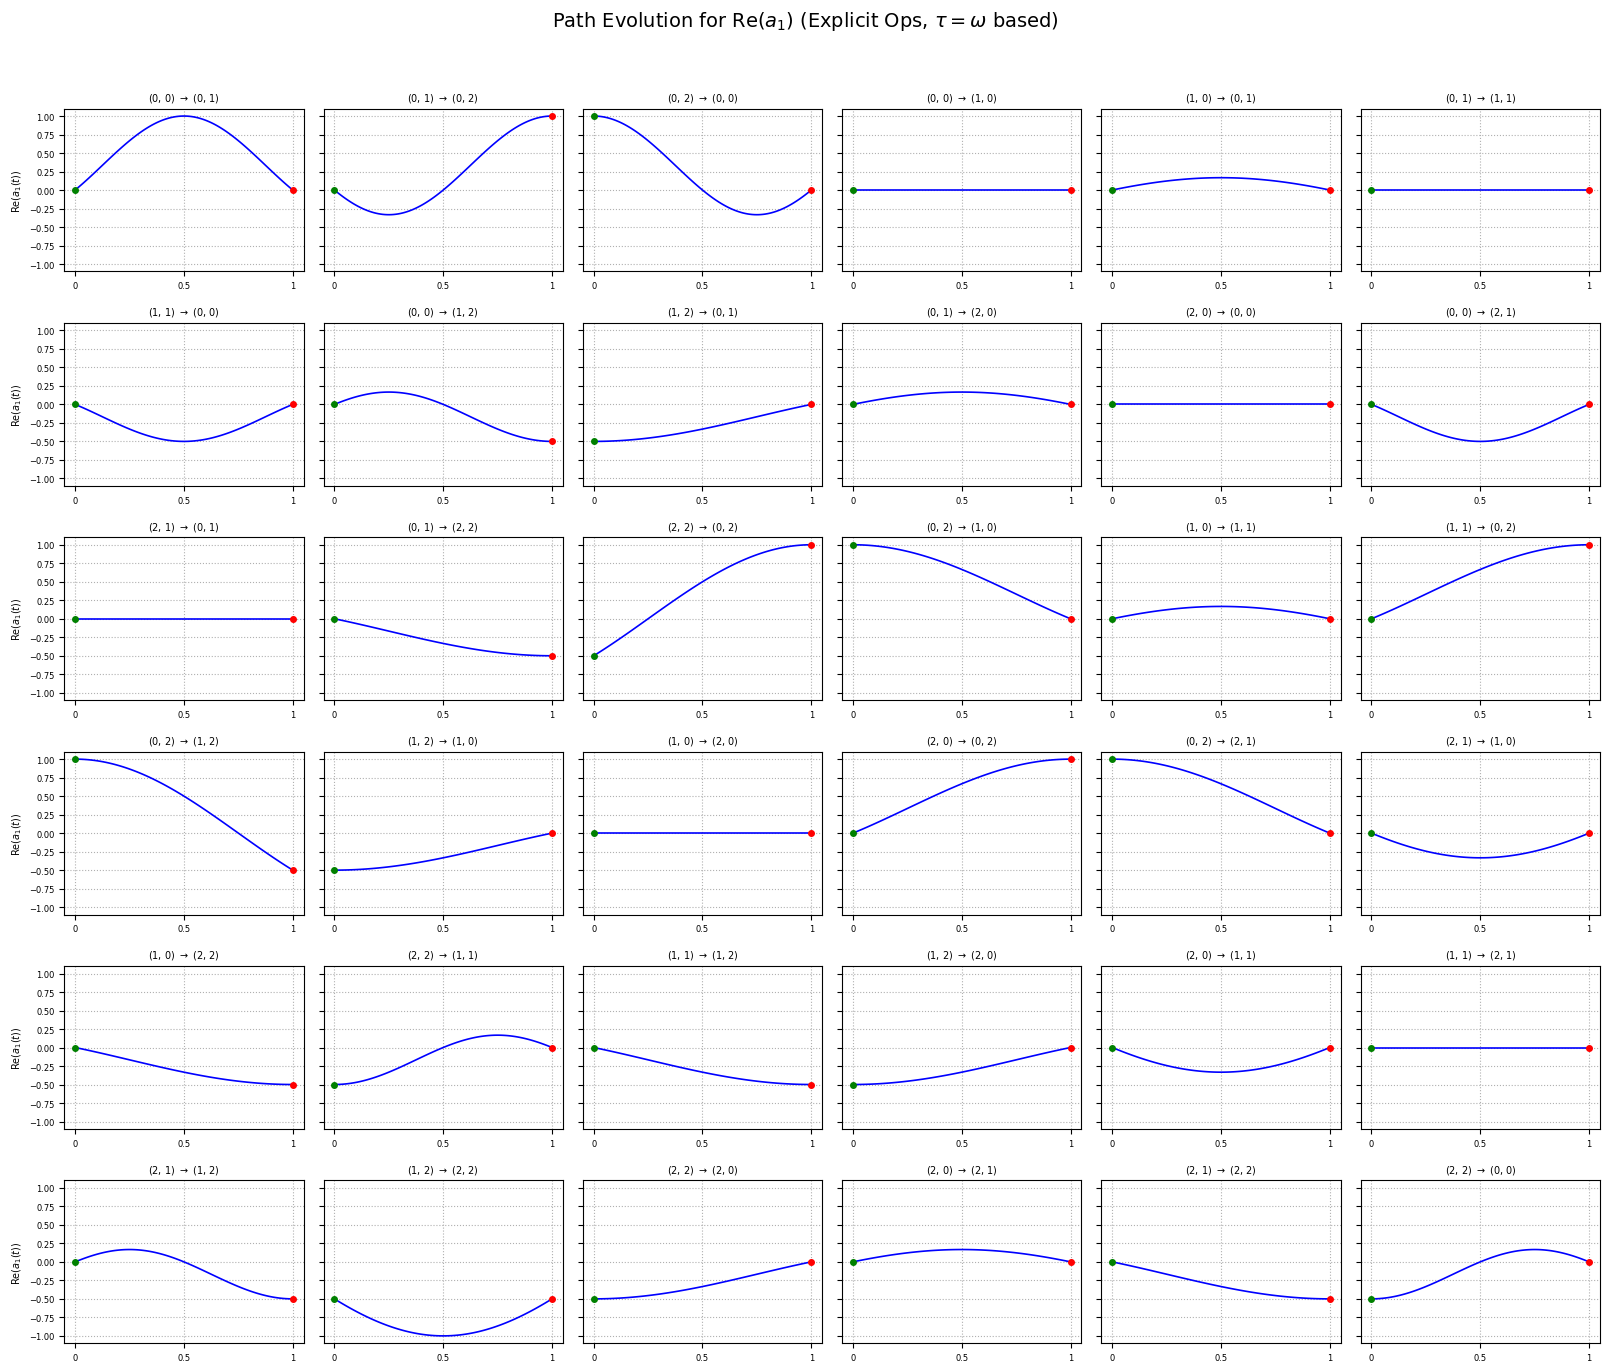

Processed and plotted Lambda_1 in 15.98 seconds (36 paths ok, 0 failed).

=== Generating Path Plots for Re(a_2) ===
Calculating and plotting paths for Lambda_2...
Saved: plots_output\path_evolution_Re_ak_2.png
Saved: plots_output\path_evolution_Re_ak_2.pdf


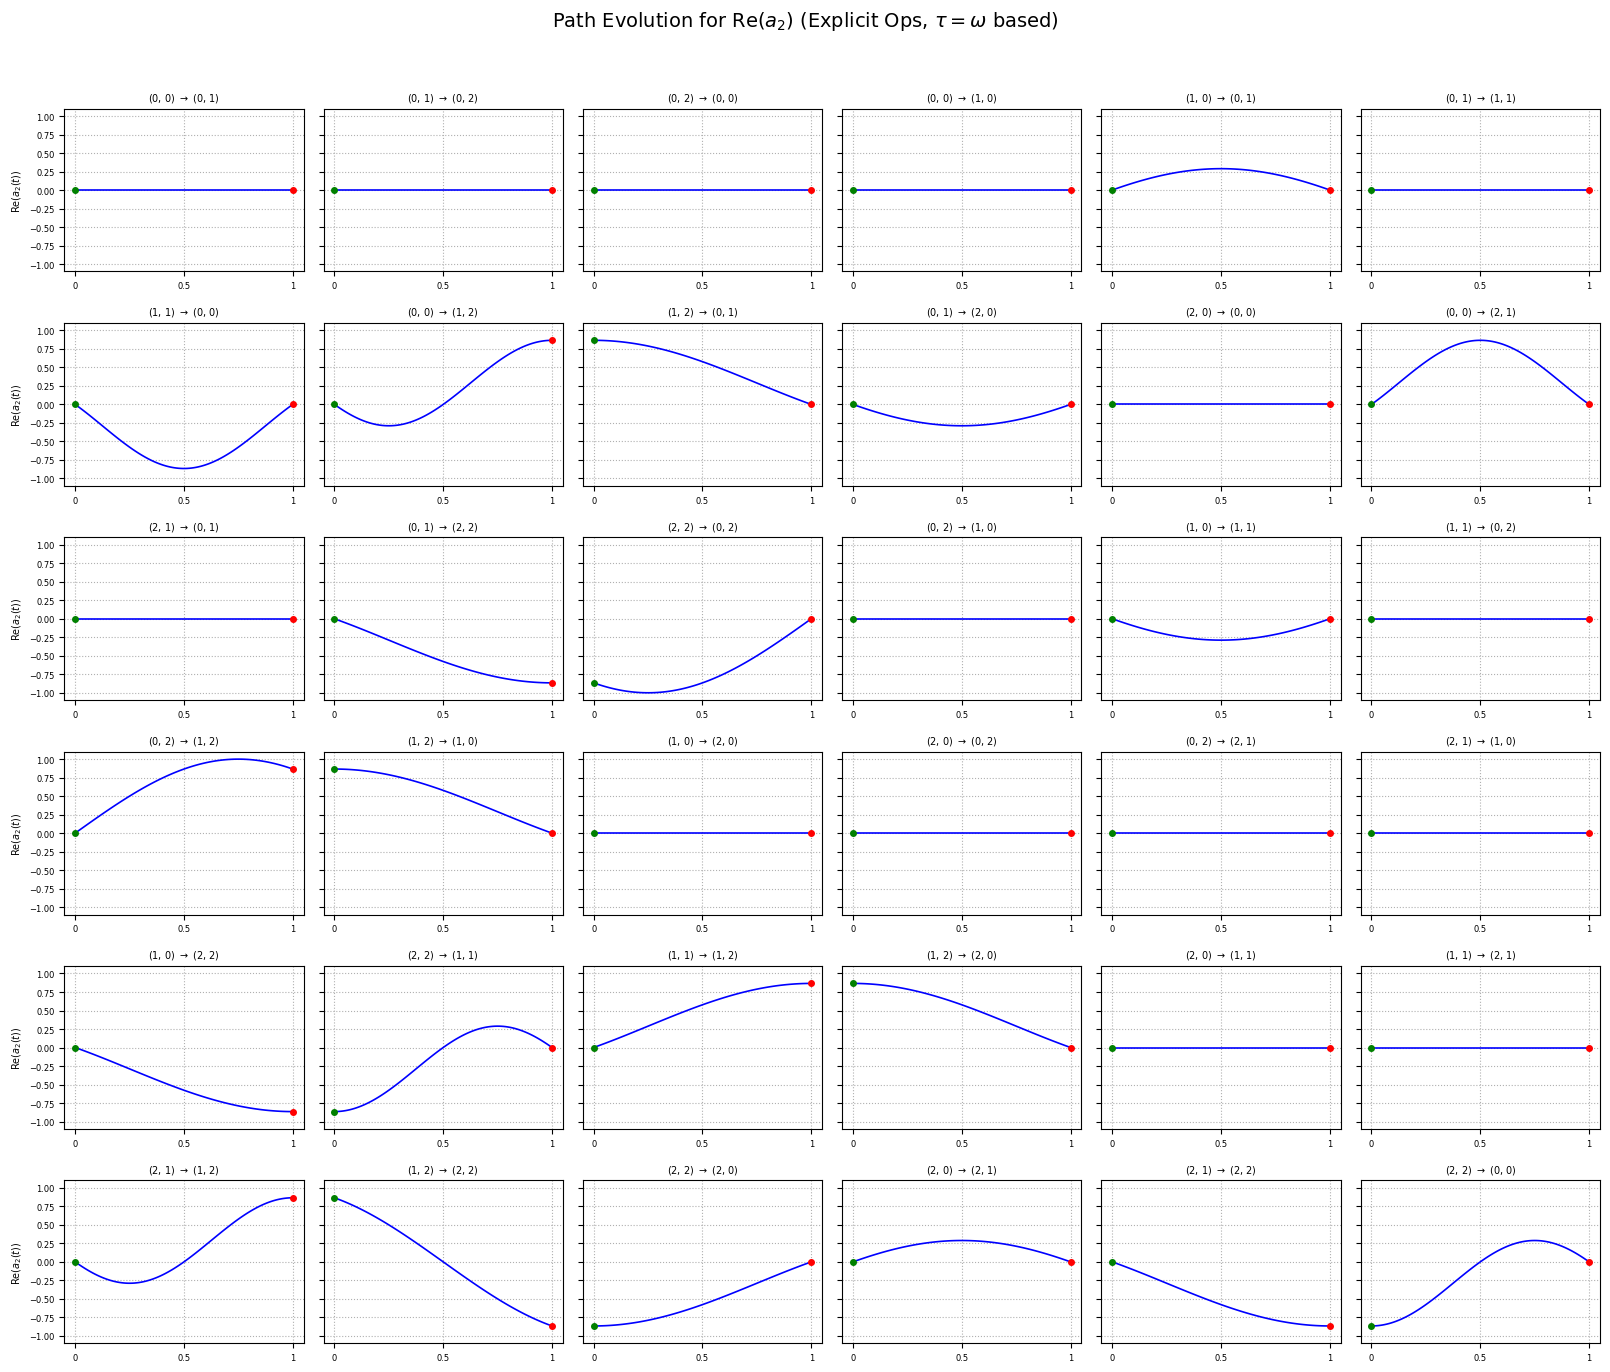

Processed and plotted Lambda_2 in 13.13 seconds (36 paths ok, 0 failed).

=== Generating Path Plots for Re(a_3) ===
Calculating and plotting paths for Lambda_3...
Saved: plots_output\path_evolution_Re_ak_3.png
Saved: plots_output\path_evolution_Re_ak_3.pdf


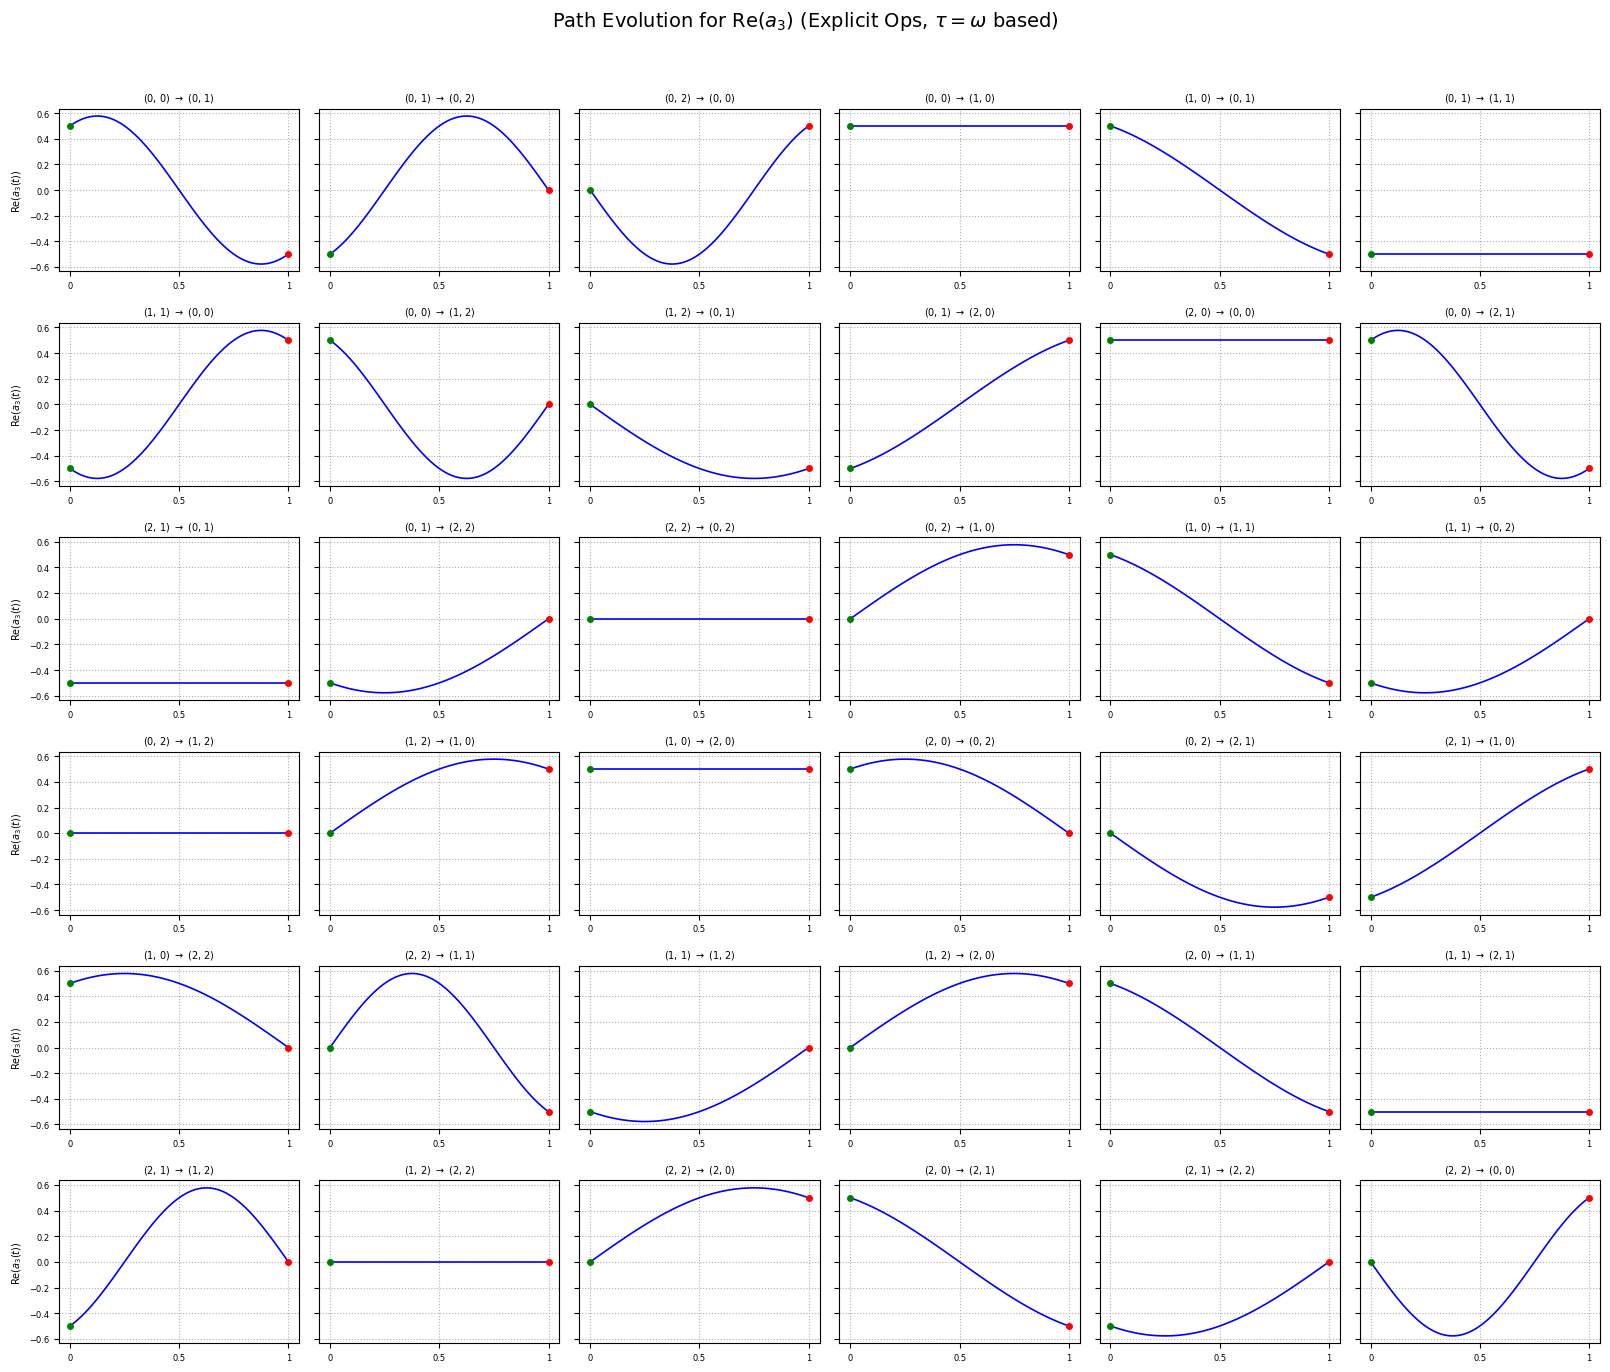

Processed and plotted Lambda_3 in 12.63 seconds (36 paths ok, 0 failed).

=== Generating Path Plots for Re(a_4) ===
Calculating and plotting paths for Lambda_4...
Saved: plots_output\path_evolution_Re_ak_4.png
Saved: plots_output\path_evolution_Re_ak_4.pdf


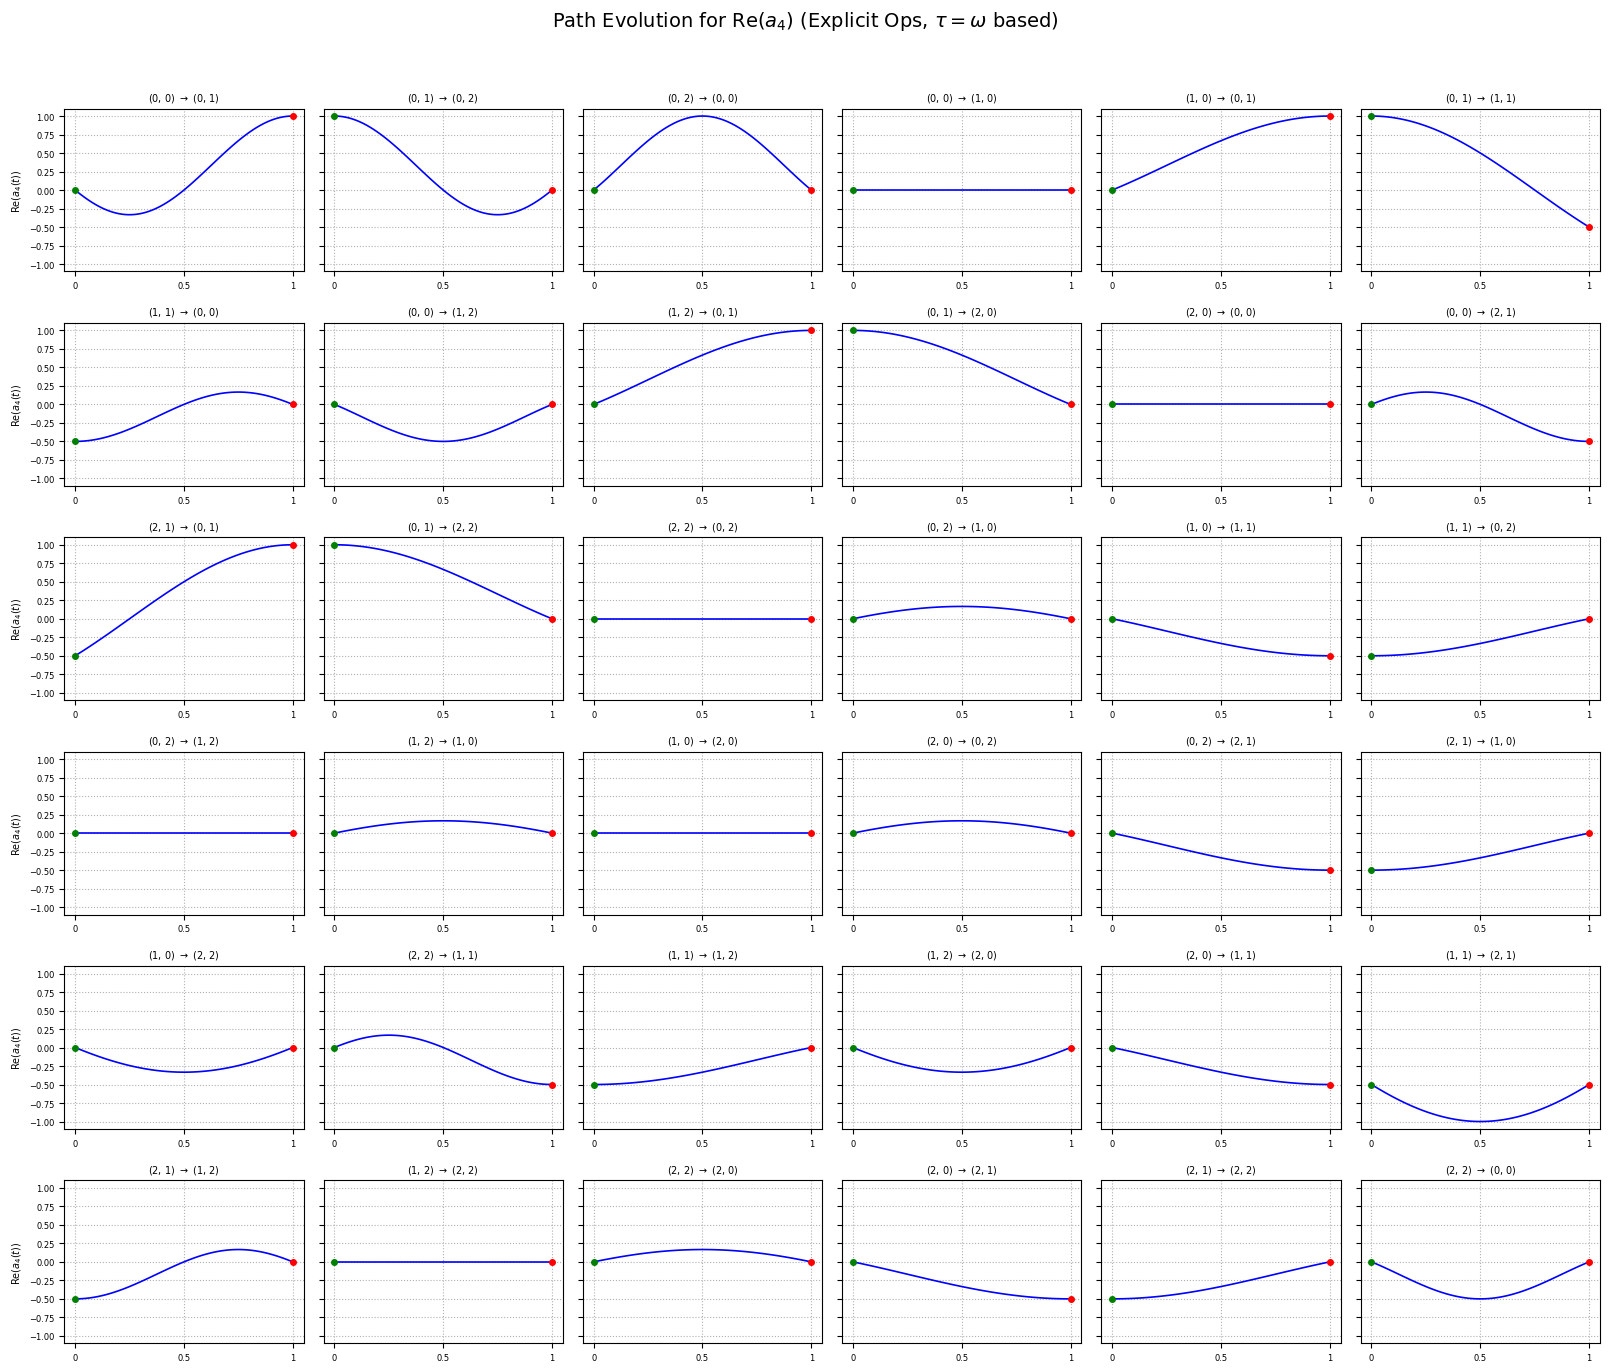

Processed and plotted Lambda_4 in 14.15 seconds (36 paths ok, 0 failed).

=== Generating Path Plots for Re(a_5) ===
Calculating and plotting paths for Lambda_5...
Saved: plots_output\path_evolution_Re_ak_5.png
Saved: plots_output\path_evolution_Re_ak_5.pdf


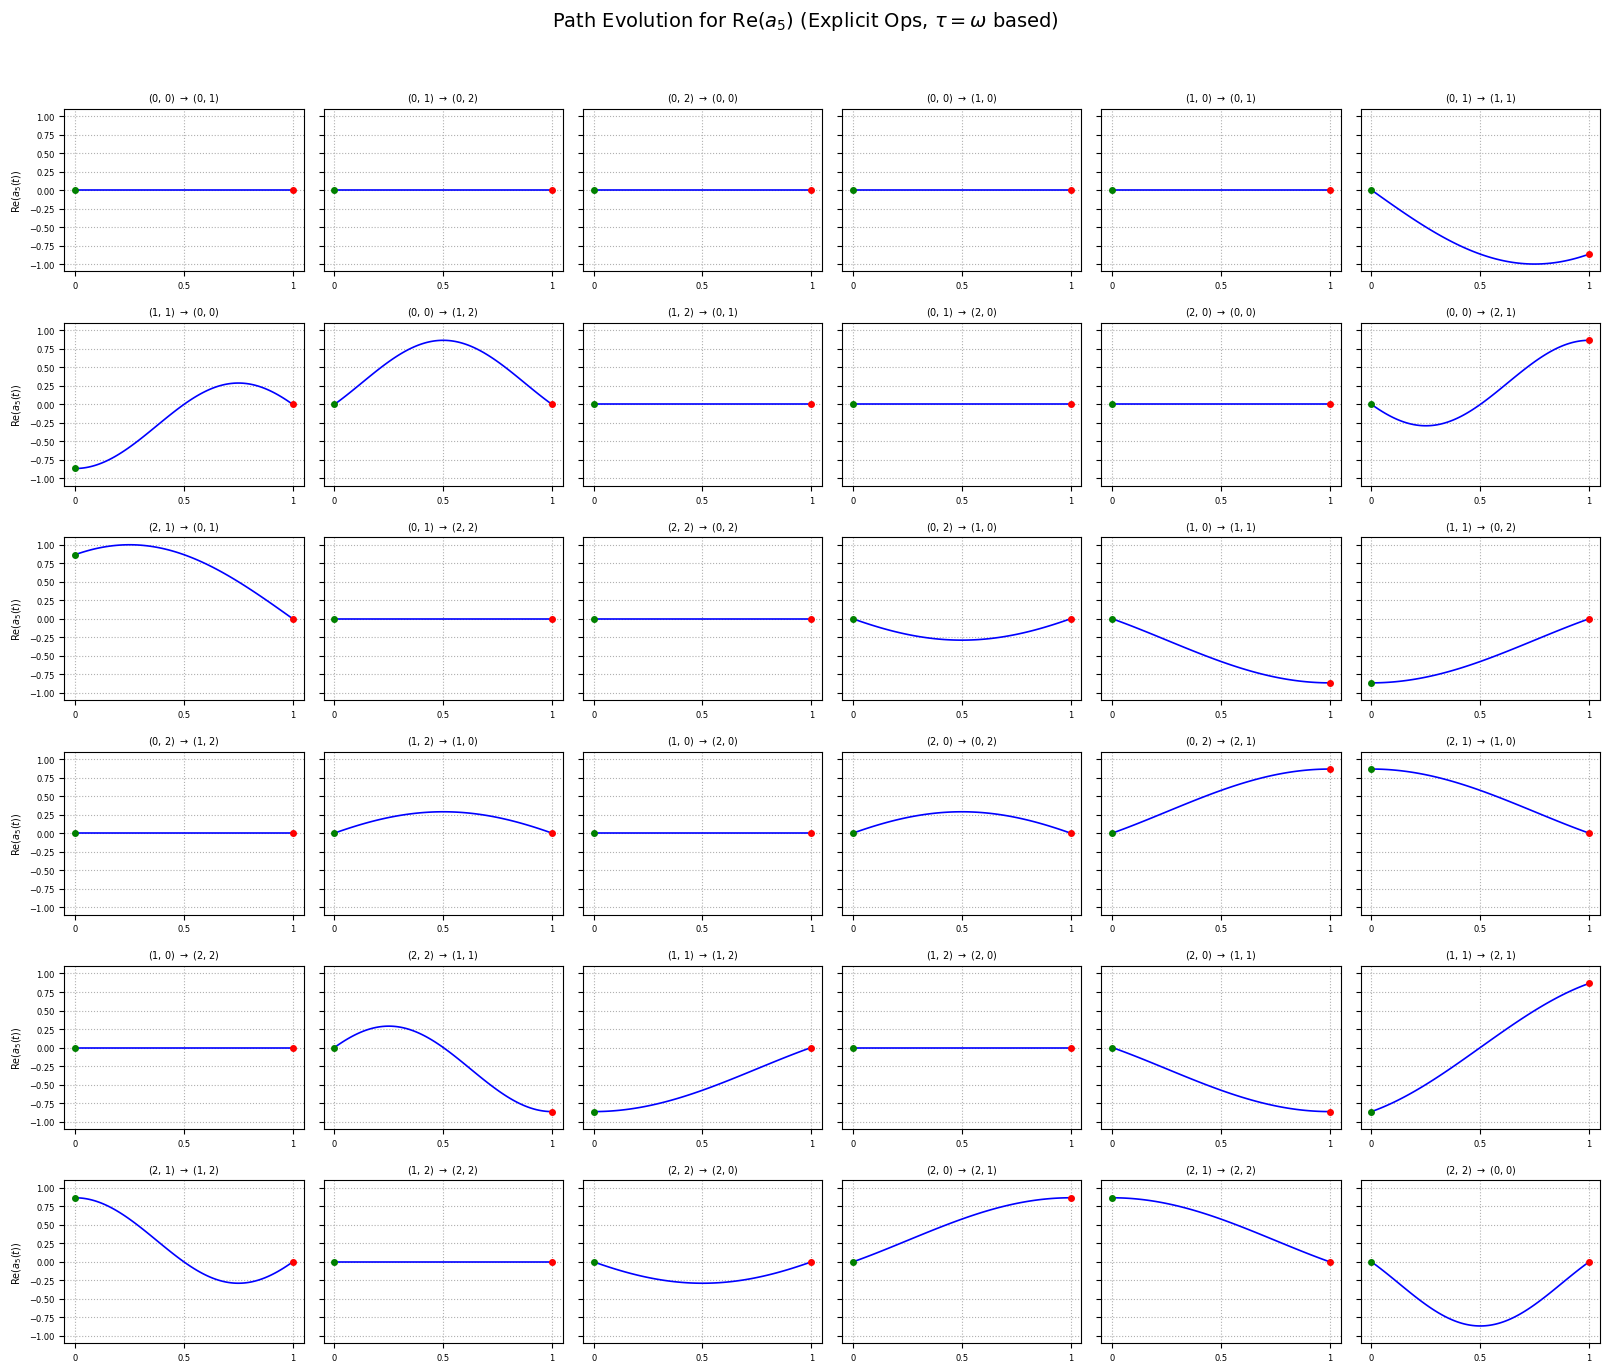

Processed and plotted Lambda_5 in 14.07 seconds (36 paths ok, 0 failed).

=== Generating Path Plots for Re(a_6) ===
Calculating and plotting paths for Lambda_6...
Saved: plots_output\path_evolution_Re_ak_6.png
Saved: plots_output\path_evolution_Re_ak_6.pdf


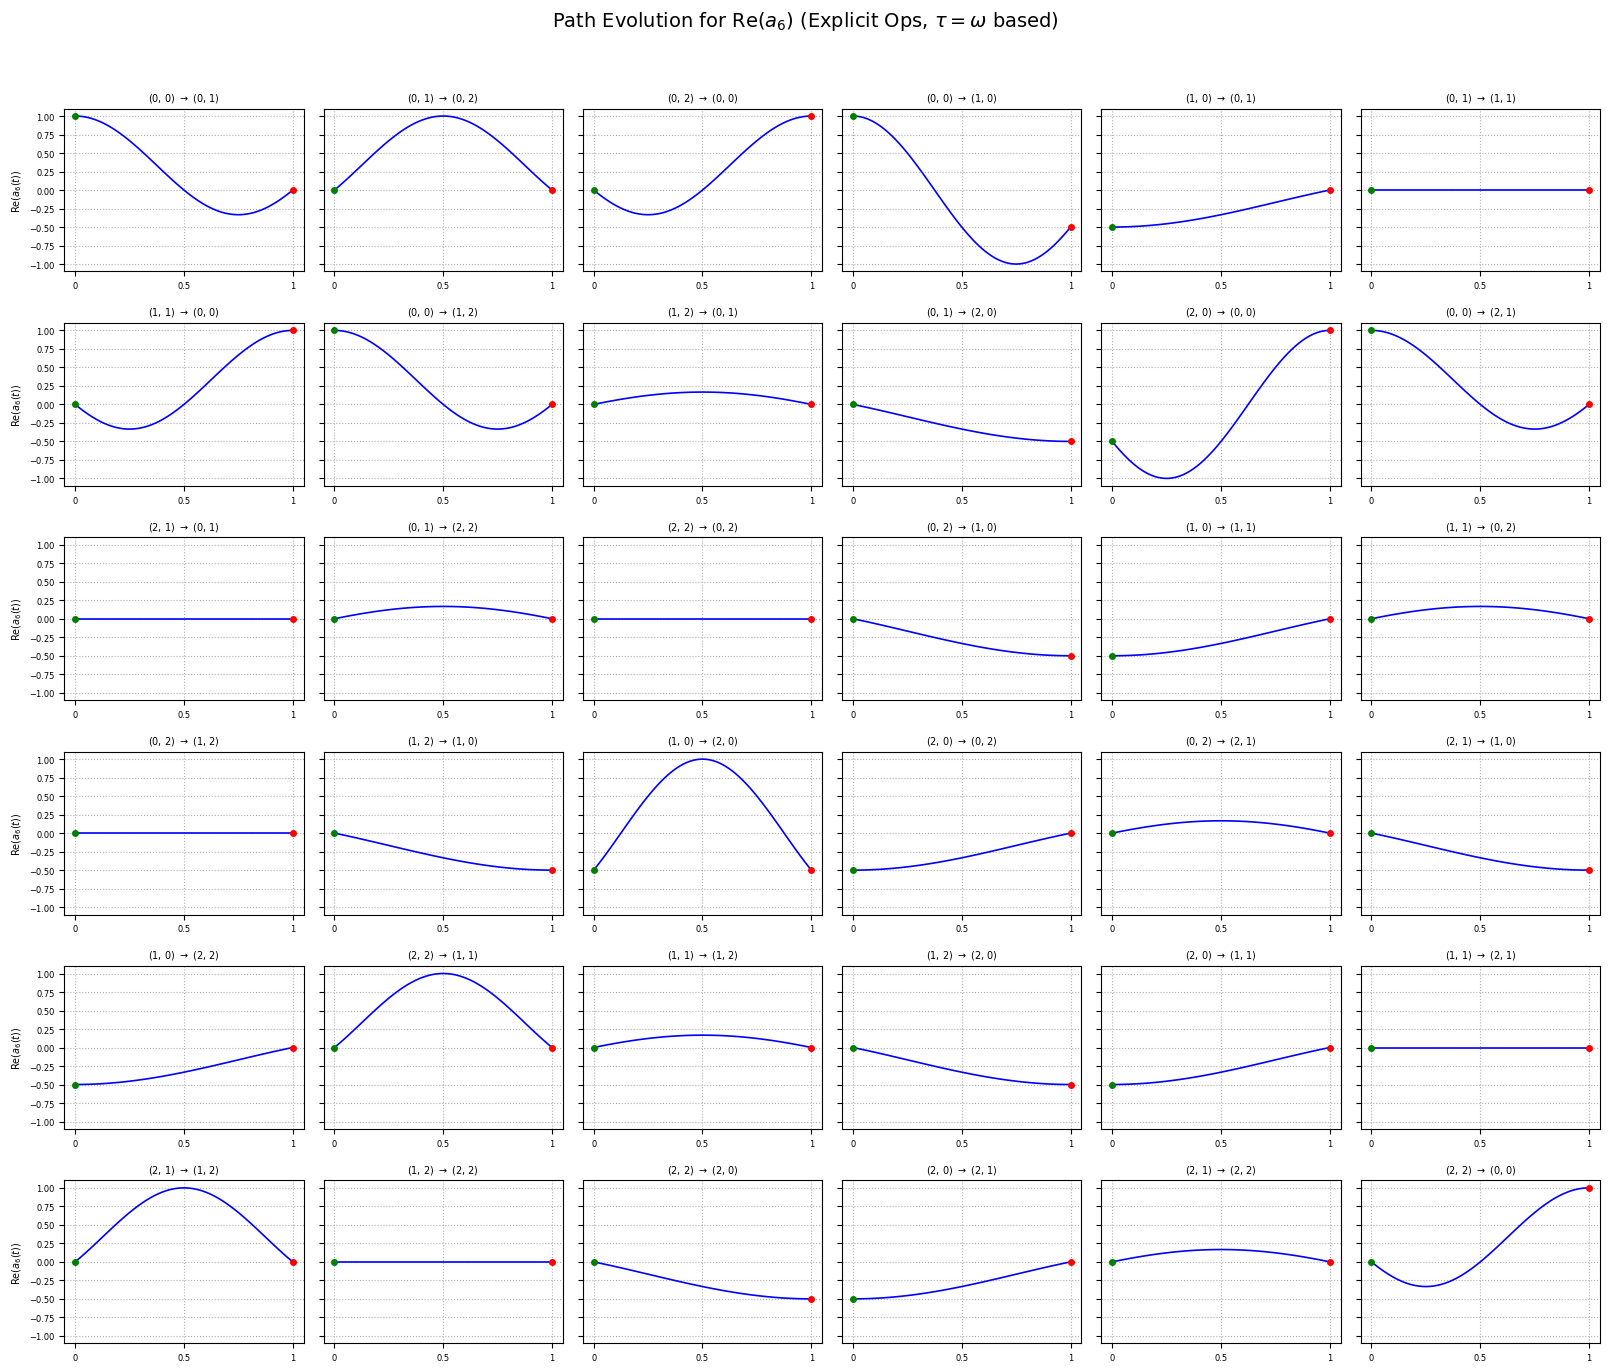

Processed and plotted Lambda_6 in 18.40 seconds (36 paths ok, 0 failed).

=== Generating Path Plots for Re(a_7) ===
Calculating and plotting paths for Lambda_7...
Saved: plots_output\path_evolution_Re_ak_7.png
Saved: plots_output\path_evolution_Re_ak_7.pdf


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
# Requires SciPy: pip install scipy
from scipy.linalg import expm, logm, LinAlgError
import itertools
import time
import random
from collections import defaultdict
import warnings
import os # Added for creating an output directory

# Suppress RuntimeWarning from invalid values etc. - uncomment if needed
# warnings.simplefilter('ignore', RuntimeWarning)

start_time = time.time()

# --- 1. Definitions and Constants ---
# Constants
omega = np.exp(2j * np.pi / 3) 
dim = 3
sqrt3 = np.sqrt(3)
print(f"Calculating with numerical omega = {omega:.5f}")

# Phase points list
phase_points = []
for p in range(dim):
    for q in range(dim): phase_points.append((p, q))

Id = np.identity(dim, dtype=complex) 

# Lambdas
lambda_1=np.array([[0,1,0],[1,0,0],[0,0,0]],dtype=complex)
lambda_2=np.array([[0,-1j,0],[1j,0,0],[0,0,0]],dtype=complex)
lambda_3=np.array([[1,0,0],[0,-1,0],[0,0,0]],dtype=complex)
lambda_4=np.array([[0,0,1],[0,0,0],[1,0,0]],dtype=complex)
lambda_5=np.array([[0,0,-1j],[0,0,0],[1j,0,0]],dtype=complex)
lambda_6=np.array([[0,0,0],[0,0,1],[0,1,0]],dtype=complex)
lambda_7=np.array([[0,0,0],[0,0,-1j],[0,1j,0]],dtype=complex)
lambda_8=(1/sqrt3)*np.array([[1,0,0],[0,1,0],[0,0,-2]],dtype=complex)
lambdas = {1: lambda_1, 2: lambda_2, 3: lambda_3, 4: lambda_4, 5: lambda_5, 6: lambda_6, 7: lambda_7, 8: lambda_8}

# --- NEW: Explicit Definitions for D(m,n) Operators ---
D_matrices_new = {
    (0,0): np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=complex),
    (0,1): np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]], dtype=complex),
    (0,2): np.array([[0, 1, 0], [0, 0, 1], [1, 0, 0]], dtype=complex),
    (1,0): np.array([[1, 0, 0], [0, omega, 0], [0, 0, omega**2]], dtype=complex),
    (1,1): np.array([[0, 0, omega], [omega**2, 0, 0], [0, 1, 0]], dtype=complex),
    (1,2): np.array([[0, omega**2, 0], [0, 0, 1], [omega, 0, 0]], dtype=complex),
    (2,0): np.array([[1, 0, 0], [0, omega**2, 0], [0, 0, omega]], dtype=complex),
    (2,1): np.array([[0, 0, omega**2], [omega, 0, 0], [0, 1, 0]], dtype=complex),
    (2,2): np.array([[0, omega, 0], [0, 0, 1], [omega**2, 0, 0]], dtype=complex)
}

# --- NEW: Explicit Definitions for A(p,q) Operators ---
A_matrices_new = {
    (0,0): np.array([[1,0,0],[0,0,1],[0,1,0]], dtype=complex),
    (0,1): np.array([[0,0,1],[0,1,0],[1,0,0]], dtype=complex),
    (0,2): np.array([[0,1,0],[1,0,0],[0,0,1]], dtype=complex),
    (1,0): np.array([[1,0,0],[0,0,omega**2],[0,omega,0]], dtype=complex),
    (1,1): np.array([[0,0,omega],[0,1,0],[omega**2,0,0]], dtype=complex),
    (1,2): np.array([[0,omega**2,0],[omega,0,0],[0,0,1]], dtype=complex),
    (2,0): np.array([[1,0,0],[0,0,omega],[0,omega**2,0]], dtype=complex),
    (2,1): np.array([[0,0,omega**2],[0,1,0],[omega,0,0]], dtype=complex),
    (2,2): np.array([[0,omega,0],[omega**2,0,0],[0,0,1]], dtype=complex)
}

# --- 3. Pre-calculate Numerical A(p,q) and D(m,n) ---
A_ops_num = {}; D_ops_num = {}
print("\n--- Populating Operators from Explicit Definitions ---")

for m in range(dim):
    for n in range(dim):
        D_ops_num[(m, n)] = D_matrices_new[(m,n)]

for p in range(dim):
    for q in range(dim):
        A_pq = A_matrices_new[(p,q)]
        assert np.allclose(A_pq, A_pq.conj().T, atol=1e-9), f"Provided A({p},{q}) failed Hermiticity check!"
        A_ops_num[(p, q)] = A_pq
print("Done populating A(p,q) (Verified Hermitian) and D(m,n) from explicit definitions.")

# --- 4. Function to Calculate Path ---
def calculate_path_coeffs(start_pq, end_pq, lambda_k, k_index, num_steps=100):
    A_start = A_ops_num[start_pq] 
    dp = (end_pq[0] - start_pq[0] + dim) % dim 
    dq = (end_pq[1] - start_pq[1] + dim) % dim

    if dp == 0 and dq == 0: 
        t_values_dummy = np.linspace(0, 1, num_steps)
        ak_static = 0.5 * np.trace(A_start @ lambda_k)
        coeffs_dummy = np.full(num_steps, ak_static, dtype=complex)
        return t_values_dummy, None, coeffs_dummy

    D_disp = D_ops_num[(dp, dq)] 
    try:
        if np.allclose(D_disp, Id): 
            H = np.zeros((dim, dim), dtype=complex)
        else:
            eigvals, eigvecs = np.linalg.eig(D_disp)
            log_eigvals = np.log(eigvals) 
            if np.any(np.isnan(log_eigvals)) or np.any(np.isinf(log_eigvals)):
                raise LinAlgError(f"Log(eig) NaN/Inf for D_disp=D({dp},{dq})")
            log_D = eigvecs @ np.diag(log_eigvals) @ np.linalg.inv(eigvecs)
            H = 1j * log_D 
        if not np.allclose(H, H.conj().T, atol=1e-7): H = 0.5 * (H + H.conj().T) 
    except LinAlgError as e:
        print(f"LinAlgError in H calc for D({dp},{dq}): {e}. Path {start_pq}->{end_pq}, Lambda_{k_index}")
        return None, None, None
    except Exception as e: 
        print(f"Unexpected error in H calc for D({dp},{dq}): {e}. Path {start_pq}->{end_pq}, Lambda_{k_index}")
        return None, None, None

    t_values = np.linspace(0, 1, num_steps)
    path_coeffs_complex = np.zeros(num_steps, dtype=complex)
    for i, t in enumerate(t_values):
        try:
            if not np.all(np.isfinite(H)): raise ValueError(f"H matrix not finite for D({dp},{dq}), t={t:.2f}")
            Dt = expm(-1j * H * t) 
            if np.any(np.isnan(Dt)) or np.any(np.isinf(Dt)): raise LinAlgError(f"expm(-iHt) NaN/Inf t={t:.2f} D({dp},{dq})")
            At = Dt @ A_start @ Dt.conj().T 
            path_coeffs_complex[i] = 0.5 * np.trace(At @ lambda_k) 
        except Exception as e:
            print(f"Error during evolution D({dp},{dq}), t={t:.2f}, L_{k_index}: {e}")
            return None, None, None
    if np.any(np.isnan(path_coeffs_complex)):
        print(f"NaNs in final coeffs D({dp},{dq}). Path {start_pq}->{end_pq}, L_{k_index}")
        return None, None, None
    return t_values, None, path_coeffs_complex

# --- 5. Define Fixed Path Order ---
print("\n--- Determining Path Order ---")
adj = defaultdict(list); edges_set = set()
for i in range(len(phase_points)):
    for j in range(i + 1, len(phase_points)):
        u, v = phase_points[i], phase_points[j]
        adj[u].append(v); adj[v].append(u)
        edges_set.add(frozenset([u, v]))
paths_to_plot = []; edge_count = len(edges_set); eulerian_path_found = False
if adj and edge_count > 0:
    start_node = phase_points[0]; stack = [start_node]; circuit_vertices = []
    adj_copy = {u_node: list(neighbors) for u_node, neighbors in adj.items()}
    processed_edges = 0
    try:
        while stack:
            u = stack[-1]; neighbor_found_in_loop = False
            eligible_neighbors_chk = list(adj_copy.get(u, []))
            for v_neighbor in eligible_neighbors_chk:
                if v_neighbor in adj_copy.get(u, []) and u in adj_copy.get(v_neighbor, []):
                    adj_copy[u].remove(v_neighbor); adj_copy[v_neighbor].remove(u)
                    stack.append(v_neighbor); processed_edges += 1; neighbor_found_in_loop = True; break
            if not neighbor_found_in_loop: circuit_vertices.append(stack.pop())
        circuit_vertices.reverse()
        if processed_edges == edge_count and circuit_vertices and circuit_vertices[0] == circuit_vertices[-1] and len(circuit_vertices) > 1 :
            ordered_paths_euler = [(circuit_vertices[i_cv], circuit_vertices[i_cv+1]) for i_cv in range(len(circuit_vertices) - 1)]
            temp_plotted_edges = set(); final_ordered_paths = []
            for path_edge in ordered_paths_euler:
                edge_repr = frozenset(path_edge)
                if edge_repr not in temp_plotted_edges: final_ordered_paths.append(path_edge); temp_plotted_edges.add(edge_repr)
            if len(final_ordered_paths) == edge_count:
                 paths_to_plot = final_ordered_paths; eulerian_path_found = True
                 print(f"Found Eulerian Circuit, {len(paths_to_plot)} unique edges will be plotted in order.")
            else:
                print(f"Eulerian path unique edges ({len(final_ordered_paths)}) != total ({edge_count}). Fallback."); raise ValueError("Eulerian edge count mismatch") # Force fallback
        else: raise ValueError("Eulerian path conditions not met") # Force fallback
    except Exception as e_euler:
        # print(f"Eulerian path determination failed/bypassed ({e_euler}). Using random fallback.")
        paths_to_plot = list(itertools.combinations(phase_points, 2))
        if paths_to_plot: random.seed(42); random.shuffle(paths_to_plot)
        eulerian_path_found = False
elif edge_count > 0 :
    paths_to_plot = list(itertools.combinations(phase_points, 2))
    if paths_to_plot: random.seed(42); random.shuffle(paths_to_plot)
    eulerian_path_found = False
else: print("No edges to plot.")
num_paths = len(paths_to_plot)
print(f"Using path order (length {num_paths}): {'Eulerian' if eulerian_path_found else ('Random Fallback' if num_paths > 0 else 'No Paths')}")

# --- 6. Main Loop for Plotting ONLY Real Parts with Endpoint Checks ---
num_steps = 100 
tol_endpoint_check = 1e-6 

# Create a directory for plots if it doesn't exist
output_plot_dir = "plots_output"
if not os.path.exists(output_plot_dir):
    os.makedirs(output_plot_dir)
print(f"\nPlots will be saved in directory: '{output_plot_dir}/'")

if num_paths == 0:
    print("\nNo paths to plot. Skipping plotting loop.")
else:
    for k_loop_idx in range(1, 9): 
        start_k_time = time.time()
        print(f"\n=== Generating Path Plots for Re(a_{k_loop_idx}) ===")
        lambda_k_matrix = lambdas[k_loop_idx] 
        endpoint_real_coeffs = {pq_coord: (0.5 * np.trace(A_ops_num[pq_coord] @ lambda_k_matrix)).real for pq_coord in phase_points}
        
        ncols = 6
        nrows = int(np.ceil(num_paths / ncols)) if num_paths > 0 else 0
        if nrows == 0 and num_paths > 0: nrows = 1

        fig, axes = None, []
        if num_paths > 0 : 
            fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 2.7, nrows * 2.4), sharey=True, squeeze=False) 
            axes = axes.flatten()

        path_index = 0; successful_paths_count = 0; failed_paths_count = 0
        all_plot_data_real = {} 
        print(f"Calculating and plotting paths for Lambda_{k_loop_idx}...")
        for i, (start_pq, end_pq) in enumerate(paths_to_plot): 
            if not axes.size or path_index >= len(axes): break 
            ax = axes[path_index]
            t_vals, _, coeffs_complex = calculate_path_coeffs(start_pq, end_pq, lambda_k_matrix, k_loop_idx, num_steps)
            plot_title = f"{start_pq} $\\rightarrow$ {end_pq}"
            if coeffs_complex is not None and t_vals is not None:
                weights_real = coeffs_complex.real 
                all_plot_data_real[path_index] = weights_real 
                ax.plot(t_vals, weights_real, '-', linewidth=1.2, color='blue')
                start_coeff_actual_real = weights_real[0]; end_coeff_actual_real = weights_real[-1]
                start_match = np.isclose(start_coeff_actual_real, endpoint_real_coeffs[start_pq], atol=tol_endpoint_check)
                end_match = np.isclose(end_coeff_actual_real, endpoint_real_coeffs[end_pq], atol=tol_endpoint_check)
                start_marker_color = 'green' if start_match else 'black'; end_marker_color = 'red' if end_match else 'orange'
                start_marker_style = 'o' if start_match else 'x'; end_marker_style = 'o' if end_match else 'x'
                ax.plot(t_vals[0], start_coeff_actual_real, marker=start_marker_style, color=start_marker_color, markersize=4, linestyle='None')
                ax.plot(t_vals[-1], end_coeff_actual_real, marker=end_marker_style, color=end_marker_color, markersize=4, linestyle='None')
                if not (start_match and end_match): plot_title += " (End FAIL)"
                successful_paths_count += 1
            else:
                plot_title = f"{start_pq} -> {end_pq} (Calc Fail)"; 
                ax.text(0.5,0.5,'Calc Error',ha='center',va='center',color='red',alpha=0.5,fontsize=7); 
                ax.set_xticks([]); ax.set_yticks([])
                failed_paths_count += 1
            ax.set_title(plot_title, fontsize=7); ax.grid(True, linestyle=':'); ax.tick_params(axis='both', which='major', labelsize=6)
            ax.set_xticks([0, 0.5, 1]); ax.set_xticklabels(['0','0.5','1'])
            if path_index % ncols == 0: ax.set_ylabel(f'Re($a_{{{k_loop_idx}}}(t)$)', fontsize=7)
            path_index += 1

        if all_plot_data_real:
            all_vals_cat = np.concatenate(list(all_plot_data_real.values())); finite_vals = all_vals_cat[np.isfinite(all_vals_cat)]
            min_y, max_y = (np.min(finite_vals), np.max(finite_vals)) if len(finite_vals)>0 else (-1,1)
            y_abs_max = max(abs(min_y), abs(max_y), 0.5) 
            shared_ylim = (-y_abs_max*1.1, y_abs_max*1.1)
        else: shared_ylim = (-1.1, 1.1) 
        for i_ax in range(min(path_index, len(axes))): axes[i_ax].set_ylim(shared_ylim) # Ensure i_ax is valid
        for i_ax in range(path_index, len(axes)): axes[i_ax].set_visible(False)

        if fig is not None:
            fig.suptitle(rf'Path Evolution for Re($a_{{{k_loop_idx}}}$) (Explicit Ops, $\tau=\omega$ based)', fontsize=14)
            plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout first

            # --- MODIFICATION: Save the figure ---
            png_filename = os.path.join(output_plot_dir, f"path_evolution_Re_ak_{k_loop_idx}.png")
            pdf_filename = os.path.join(output_plot_dir, f"path_evolution_Re_ak_{k_loop_idx}.pdf")
            try:
                fig.savefig(png_filename, dpi=300, bbox_inches='tight')
                print(f"Saved: {png_filename}")
                fig.savefig(pdf_filename, bbox_inches='tight')
                print(f"Saved: {pdf_filename}")
            except Exception as e_save:
                print(f"Error saving plot for k={k_loop_idx}: {e_save}")
            # --- END MODIFICATION ---

            plt.show() # Display the plot
            plt.close(fig) # Close the figure to free memory
        
        end_k_time = time.time()
        print(f"Processed and plotted Lambda_{k_loop_idx} in {end_k_time - start_k_time:.2f} seconds ({successful_paths_count} paths ok, {failed_paths_count} failed).")

total_time = time.time() - start_time
print(f"\n=== All 8 Plot Sets Generated in {total_time:.2f} seconds ===")